In [1]:
#import libraries and dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from langdetect import detect

In [2]:
def Remove1(txt):
    # Apply lowercasing
    txt = str(txt).lower()
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    # Remove punctuations
    txt = re.sub(r'[^\w\s]', '', txt)
    #re
    txt = txt.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
                           .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
                           .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
                           .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
                           .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
                           .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
                           .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
                           .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
                           .replace("'cause'"," because")
    return txt

In [3]:
#import data and text preprocessing
df = pd.read_csv('Product_Reviews.csv')
df['content'] = df['content'].apply(Remove1)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,App,act_label
0,bea12a69-44c2-4d0a-a656-ae65e28ee479,Sarah Fraley,https://play-lh.googleusercontent.com/a-/AD_cM...,i stream on my phone a lot and the videos wont...,1,0,8.74.0 build 6 50443,2023-06-23 20:06:39,NaN,NaN,8.74.0 build 6 50443,netflix,negative
1,41ad2ab6-86fb-4093-9b4f-933fc2135935,RuTh SanaBs,https://play-lh.googleusercontent.com/a/AAcHTt...,78755rf de deidnxnzsni you are a a,3,0,8.74.0 build 6 50443,2023-06-23 20:02:39,NaN,NaN,8.74.0 build 6 50443,netflix,neutral
2,e71f82d0-5b43-4ede-a282-323878de79b7,Ruben Adonis,https://play-lh.googleusercontent.com/a/AAcHTt...,good,5,0,8.52.2 build 14 50335,2023-06-23 19:56:44,NaN,NaN,8.52.2 build 14 50335,netflix,positive
3,6a12e5fe-765f-4429-8848-f8a2c9f6f181,Shannon Schroers,https://play-lh.googleusercontent.com/a/AAcHTt...,ive been a customer since i rented dvds throug...,1,0,8.30.3 build 14 50239,2023-06-23 19:49:11,NaN,NaN,8.30.3 build 14 50239,netflix,negative
4,d714d622-0d95-47b3-a25a-8afdc201a0d6,Priya Suman,https://play-lh.googleusercontent.com/a-/AD_cM...,i have no downloads on any device and it still...,1,0,8.74.0 build 6 50443,2023-06-23 19:41:05,NaN,NaN,8.74.0 build 6 50443,netflix,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,a89987d1-9a30-48ec-ad77-5592125c8dc1,Archit Mestry,https://play-lh.googleusercontent.com/a-/AD_cM...,why design ui so bad very bad,1,0,3.0.345.16647,2023-05-16 02:40:19,NaN,NaN,3.0.345.16647,Amazon,negative
27996,26985264-4035-482e-886a-fc8a988d84df,pragya jyotish,https://play-lh.googleusercontent.com/a/AAcHTt...,very poor experience bcoz even after being a p...,1,0,3.0.345.16647,2023-05-16 02:30:45,NaN,NaN,3.0.345.16647,Amazon,negative
27997,ffab53c8-3dba-4a87-87fb-2bc65fce1cda,Harman Tjahya,https://play-lh.googleusercontent.com/a-/AD_cM...,complete easy to watch,5,0,3.0.345.16647,2023-05-16 02:19:48,NaN,NaN,3.0.345.16647,Amazon,positive
27998,bff3af89-8c52-4bbd-af98-eea31347c9a3,Nyauzha Spells,https://play-lh.googleusercontent.com/a/AAcHTt...,i like it,5,0,NaN,2023-05-16 02:06:05,NaN,NaN,NaN,Amazon,positive


In [4]:
df1 = df[['content', 'act_label','score']].copy()
df1

,content,act_label,score
0,i stream on my phone a lot and the videos wont...,negative,1
1,78755rf de deidnxnzsni you are a a,neutral,3
2,good,positive,5
3,ive been a customer since i rented dvds throug...,negative,1
4,i have no downloads on any device and it still...,negative,1
...,...,...,...
27995,why design ui so bad very bad,negative,1
27996,very poor experience bcoz even after being a p...,negative,1
27997,complete easy to watch,positive,5
27998,i like it,positive,5


In [5]:
# Detect language of text
def lange(row):
    """try and except block for catching exception errors"""
    x = None
    # the try will run when everything is ok
    try:
        text = str(row)
        x = detect(text)
        return x
        
    # this will catch all the errors that occur  
    except:
        return x


In [23]:
#extract language
%%time
df1['lang'] = df1['content'].apply(lange)
df1['lang'].value_counts()

CPU times: total: 1min 33s
Wall time: 2min 29s


en       20822
so         979
af         970
sl         472
ro         401
it         395
ca         312
pl         307
fr         292
no         251
nl         244
cy         205
tl         192
sw         171
sk         169
id         159
es         155
sq         138
da         134
et         129
hr         128
pt         115
fi          87
sv          83
cs          80
hu          63
tr          56
ar          46
de          35
lv          29
vi          26
lt          17
fa          12
hi          11
ur           6
bn           6
th           4
mr           4
ko           3
el           2
ne           2
pa           1
he           1
ja           1
uk           1
zh-cn        1
kn           1
ml           1
Name: lang, dtype: int64

In [24]:
#apply filter
options = ['en', 'af','so'] 
    
# selecting rows based on condition 
df2 = df1[df1['lang'].isin(options)] 

df2

,content,act_label,score,lang
0,i stream on my phone a lot and the videos wont...,negative,1,en
2,good,positive,5,so
3,ive been a customer since i rented dvds throug...,negative,1,en
4,i have no downloads on any device and it still...,negative,1,en
5,its good but movies i search ont it are 98 not...,neutral,3,en
...,...,...,...,...
27994,whats the sense of buying a subscription if yo...,neutral,3,en
27995,why design ui so bad very bad,negative,1,en
27996,very poor experience bcoz even after being a p...,negative,1,en
27997,complete easy to watch,positive,5,en


In [25]:
df2['act_label'].value_counts()

negative    12200
positive     8838
neutral      1733
Name: act_label, dtype: int64

In [26]:
import string
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, TweetTokenizer

In [27]:
#tokenize text using NLTK
def preprocess(text):
    # Tokenize
    tokenized_text = word_tokenize(text)
    # Don't stem as overlap with embeddings vocab is close to 0 
    # DON'T remove stop words as they carry imp info about the meaning of the sentence and non-alphanumeric tokens
    cleaned_tokens = [t for t in tokenized_text if t.isalnum() and t not in common]
    cleaned_string = " ".join(cleaned_tokens)
    return cleaned_string


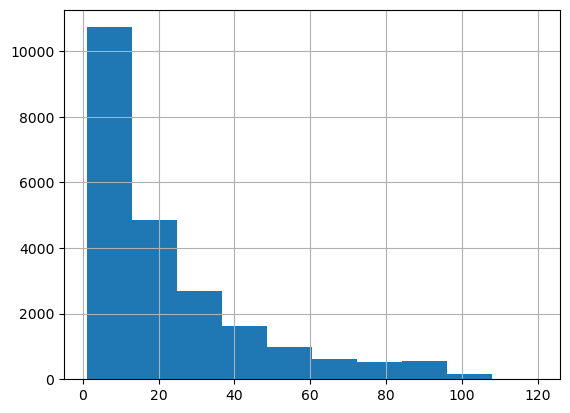

Mean: 21.9873
Std: 22.5006
Mean+3*Std = 89.4890


In [28]:
#Graph to illustrate text length 
lengths = df2["content"].apply(lambda x : len(x.split(" "))) # try mean + 3*sigma
lengths.hist()
plt.show()

mean = lengths.mean()
std = lengths.std()
approx_nseq = mean + 3*std
print(f"Mean: {mean:.4f}\nStd: {std:.4f}\nMean+3*Std = {approx_nseq:.4f}")


In [29]:
N_SEQ = 32

In [30]:
#geting numerical 
def mgg(x):
    n = None
    if x == "positive":
        n = 2
    elif x == "neutral":
        n = 1
    else:
        n = 0
    return n

In [31]:
df2['label'] = df2['act_label'].apply(mgg)
df3 = df2[['content', 'label']]
df3

C:\Users\User\AppData\Local\Temp\ipykernel_28604\2282193737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'] = df2['act_label'].apply(mgg)


,content,label
0,i stream on my phone a lot and the videos wont...,0
2,good,2
3,ive been a customer since i rented dvds throug...,0
4,i have no downloads on any device and it still...,0
5,its good but movies i search ont it are 98 not...,1
...,...,...
27994,whats the sense of buying a subscription if yo...,1
27995,why design ui so bad very bad,0
27996,very poor experience bcoz even after being a p...,0
27997,complete easy to watch,2


In [34]:
from sklearn.model_selection import train_test_split

#Training, Validation and Test Set.
train, test = train_test_split(df3,train_size = 0.85,shuffle = True, random_state=123)



# Word Embeddings

In [35]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

In [36]:
train

,content,label
18531,it does not load on my chromebook after i had ...,0
11845,way better than netflix,2
26120,love the selection the only complaint i have i...,2
11886,never had a problem with this app until recent...,0
27304,love amazon prime works well with great movie ...,2
...,...,...
18860,the new update sucks im so mad i almost dont e...,0
26518,i love this app lots of great shows,2
21488,the best to have,2
19231,i love the app but ever since the update i hav...,2


In [37]:
X_train, y_train = np.array(train['content']), np.array(train['label'])
X_test, y_test = np.array(test['content']), np.array(test['label'])
#X_valid, y_valid = np.array(valid['content']), np.array(valid['label'])

In [38]:
%%time

# Defining the model and training it.
word2vec_model = Word2Vec(X_train,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 60
CPU times: total: 1.36 s
Wall time: 1.8 s


In [42]:
# Defining the model input length.
input_length = 60
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train

In [43]:
vocab_length = 12000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)


Tokenizer vocab length: 12000


In [44]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (19355, 60)
X_test.shape : (3416, 60)


In [45]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (12000, 100)


# Modeling

In [46]:
#Importing tensorflow and dependencies
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [47]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [48]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           1200000   
                                                                 
 bidirectional (Bidirection  (None, 60, 200)           160800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 60, 200)           240800    
 onal)                                                           
                                                                 
 conv1d (Conv1D)             (None, 56, 100)           100100    
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                   

In [49]:
#how to stop training to reduce loss during cross-validation
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [50]:
training_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
#training
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=12,
    validation_split=0.17, # 15% validation set
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/12


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


16/16 [==============================] - 47s 3s/step - loss: 0.0000e+00 - accuracy: 0.5309 - val_loss: 0.0000e+00 - val_accuracy: 0.5305 - lr: 0.0010
Epoch 2/12
16/16 [==============================] - 44s 3s/step - loss: 0.0000e+00 - accuracy: 0.5342 - val_loss: 0.0000e+00 - val_accuracy: 0.5305 - lr: 0.0010
Epoch 3/12
16/16 [==============================] - 47s 3s/step - loss: 0.0000e+00 - accuracy: 0.5342 - val_loss: 0.0000e+00 - val_accuracy: 0.5305 - lr: 0.0010
Epoch 4/12
16/16 [==============================] - 46s 3s/step - loss: 0.0000e+00 - accuracy: 0.5342 - val_loss: 0.0000e+00 - val_accuracy: 0.5305 - lr: 0.0010
Epoch 5/12
16/16 [==============================] - 45s 3s/step - loss: 0.0000e+00 - accuracy: 0.5342 - val_loss: 0.0000e+00 - val_accuracy: 0.5305 - lr: 0.0010
Epoch 6/12
16/16 [==============================] - 46s 3s/step - loss: 0.0000e+00 - accuracy: 0.5342 - val_loss: 0.0000e+00 - val_accuracy: 0.5305 - lr: 0.0010


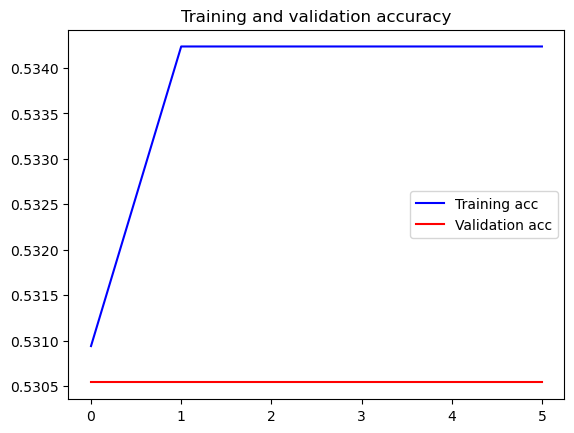

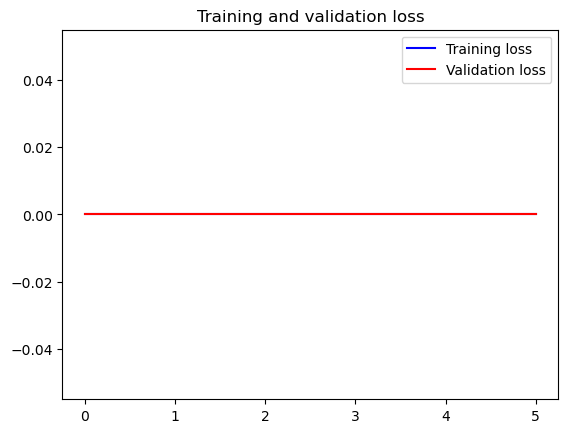

In [52]:
#output values
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
def worded(x):
    n = None
    if x == 0:
        n = "negative"
    elif x == 1:
        n = "neutral"
    else:
        n = "positive"
    return n

In [57]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test)
print(y_pred)

107/107 [==============================] - 3s 29ms/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [62]:
#convert predicted numerical labels to positive, negative and neutral
result = [] 
for element in y_pred:
    result.append(worded(int(element)))

# Print the result
print(result)


['negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'ne

In [63]:
act = []
for element in y_test:
    act.append(worded(int(element)))

# Print the result
print(act)

['positive', 'positive', 'positive', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'negative', 'positive', 'positive', 'negative', 'positive', 'neutral', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative'

In [71]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

labels = ['positive','neutral','negative']

cm = multilabel_confusion_matrix(result, act, labels =labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= labels)
print(cm)

[[[2123 1293]
  [   0    0]]

 [[3165  251]
  [   0    0]]

 [[   0    0]
  [1544 1872]]]


In [73]:
# Print the evaluation metrics for the dataset.
print(classification_report(act, result))


              precision    recall  f1-score   support

    negative       0.55      1.00      0.71      1872
     neutral       0.00      0.00      0.00       251
    positive       0.00      0.00      0.00      1293

    accuracy                           0.55      3416
   macro avg       0.18      0.33      0.24      3416
weighted avg       0.30      0.55      0.39      3416



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
textb_bac = balanced_accuracy_score(act, result)
textb_f1 = f1_score(act, result,average = 'weighted' )
textb_recall = recall_score(act, result, average = 'weighted')
textb_precision = precision_score(act, result, average = 'weighted')
print('BiLSTM Metrics')
print("Accuracy:", textb_bac)
print("F1-Score:",textb_f1)
print("Recall:", textb_recall)
print("Precision:", textb_precision)

BiLSTM Metrics
Accuracy: 0.3333333333333333
F1-Score: 0.38800058105134866
Recall: 0.5480093676814989
Precision: 0.3003142670666762


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
